In [ ]:
# lOGIGSTIC REGRESSION - BINARY CLASSIFICATION
# Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention 
# (i.e. whether they leave the company or continue to work)
# Plot bar charts showing impact of employee salaries on retention
# Plot bar charts showing corelation between department and employee retention
# Now build logistic regression model using variables that were narrowed down in step 1
# Measure the accuracy of the model

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv("data/HR_data.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
left =  df[df.left==1]
remain = df[df.left==0]
left.shape


(3571, 10)

In [24]:
remain.shape

(11428, 10)

In [25]:
new_df = df.drop(['Department','salary'],axis=1)

new_df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

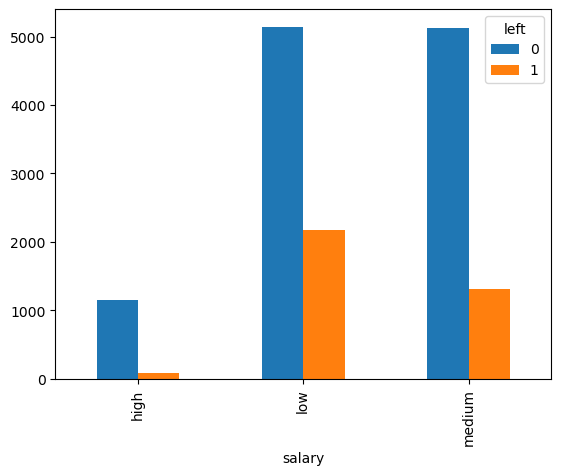

In [7]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [20]:
# left'/retention depends on below variables
# **Satisfaction Level**
# **Average Monthly Hours**
# **Promotion Last 5 Years**
# **Salary**

In [29]:
#keep only relevant features
upd_df = df.drop(['last_evaluation','time_spend_company','Work_accident','Department','left'],axis=1)
upd_df.head()

,satisfaction_level,number_project,average_montly_hours,promotion_last_5years,salary
0,0.38,2,157,0,low
1,0.80,5,262,0,medium
2,0.11,7,272,0,medium
3,0.72,5,223,0,low
4,0.37,2,159,0,low


In [30]:
#change salary col as nums to train the model
salary_dummies = pd.get_dummies(upd_df.salary, prefix="salary",dtype=int)
df_with_dummies = pd.concat([upd_df,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,number_project,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,2,157,0,low,0,1,0
1,0.80,5,262,0,medium,0,0,1
2,0.11,7,272,0,medium,0,0,1
3,0.72,5,223,0,low,0,1,0
4,0.37,2,159,0,low,0,1,0


In [31]:
df_with_dummies.drop('salary',axis=1,inplace=True)
df_with_dummies

,satisfaction_level,number_project,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,2,157,0,0,1,0
1,0.80,5,262,0,0,0,1
2,0.11,7,272,0,0,0,1
3,0.72,5,223,0,0,1,0
4,0.37,2,159,0,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,2,151,0,0,1,0
14995,0.37,2,160,0,0,1,0
14996,0.37,2,143,0,0,1,0
14997,0.11,6,280,0,0,1,0


In [32]:
X=df_with_dummies
y = df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [45]:
# break the data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [43]:
# train the training data now

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [46]:
model.fit(X_train,y_train)

LogisticRegression()

In [47]:
model.score(X_test,y_test)

0.776